In [16]:
#Regres.py
#-*-coding:utf-8-*-
import numpy as np
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('D:\\PUB128\\horseColic\\testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
    '''
    输入：sigmoid函数的输入值
    输出：sigmoid函数输出结果
    描述：sigmoid函数实现
    '''
    return 1.0/(1.0+np.exp(-inX))

def gradAscent(dataMatIn, classLabels):
    '''
    输入：数据集，对应数据的类标签
    输出：回归系数
    描述：批量梯度上升法实现
    '''
    dataMatrix = np.mat(dataMatIn)             #转为NumPy矩阵
    labelMat = np.mat(classLabels).transpose() #转为NumPy矩阵
    m,n = np.shape(dataMatrix)      #得到数据集 行数（样本数）和 列数（特征数)
    alpha = 0.001                #梯度上升法迭代式中的 迭代步长                    
    maxIter = 500                #最大迭代次数
    weights = np.ones((n,1))        #将回归系数各分量初始化为1
    for k in range(maxIter):                
        h = sigmoid(dataMatrix*weights)     #得到sigmoid的输出值
        error = (labelMat - h)              #使用向量减法计算误差
        weights = weights + alpha * dataMatrix.transpose()* error #梯度上升法迭代式实现
    return weights

def stocGradAscent0(dataMatrix, classLabels):
    '''
    输入：数据集，对应数据的类标签
    输出：回归系数
    描述：随机梯度上升法实现
    '''
    m,n = np.shape(dataMatrix)  #得到数据集 行数（样本数）和 列数（特征数)
    alpha = 0.01             #梯度上升法迭代式中的 迭代步长   
    weights = np.ones(n)        #将回归系数各分量初始化为1
    for i in range(m):       #对于所有数据样本
        h = sigmoid(sum(dataMatrix[i]*weights))            #得到sigmoid的输出值
        error = classLabels[i] - h                         #使用向量减法计算误差
        weights = weights + alpha * error * dataMatrix[i]  #梯度上升法迭代式实现
    return weights

def stocGradAscent1(dataMatrix, classLabels, maxIter=150):
    '''
    输入：数据集，对应数据的类标签
    输出：回归系数
    描述：stocGradAscent0函数的改进版本，降低了结果的
    周期性波动，提高了结果的收敛速度
    注：相对stocGradAscent0改进的部分用
    '''
    m,n = np.shape(dataMatrix)  #得到数据集 行数（样本数）和 列数（特征数)
    weights = np.ones(n)        #将回归系数各分量初始化为1
    for j in range(maxIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001 #【改进1】：alpha在每次迭代都会调整，会一定程度上缓解
                                       #结果的周期性波动。同时，由于常数项的存在，虽然alpha会
                                       #随着迭代次数不断减少，但永远都不会减少到 0。这保证了多
                                       #次迭代后新数据仍然会有影响
            randIndex = int(np.random.uniform(0,len(dataIndex)))#【改进2】：随机选取样本更新回归系数
                                                             #也可缓解结果的周期性波动
            h = sigmoid(sum(dataMatrix[randIndex]*weights))            #得到sigmoid的输出值
            error = classLabels[randIndex] - h                         #使用向量减法计算误差
            weights = weights + alpha * error * dataMatrix[randIndex]  #梯度上升法迭代式实现
            del(dataIndex[randIndex])  #将随机选择的样本从数据集中删除，避免影响下一次迭代
    return weights
	
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

def classifyVector(inX, weights):
    '''
    输入：样本数据，回归系数
    输出：分类结果（0 或 1）
    描述：使用优化后的回归系数对数据进行分类
    '''
    prob = sigmoid(sum(inX*weights)) #计算sigmoid函数输出结果
    if prob > 0.5: return 1.0
    else: return 0.0

def colicTest():
    frTrain = open('D:\\PUB128\\horseColic\\horseColicTraining.txt')#打开训练集文件
    frTest = open('D:\\PUB128\\horseColic\\horseColicTest.txt')     #打开测试集文件
    #将训练集数据和对应标签存放到trainingSet和trainingLabels中
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    #训练算法，得到回归系数trainWeights
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 1000)
    #每行读取测试集数据，使用回归系数得到分类结果
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        #若分类结果不一致，则errorCount加一
        if int(classifyVector(np.array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    #打印此次测试的错误率
    print ("the error rate of this test is: %f" % errorRate)
    return errorRate

def multiTest(numTests=10):
    errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print ("after %d iterations,the average error rate is: %f" % (numTests, errorSum/float(numTests)))

multiTest()
        

D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


the error rate of this test is: 0.268657
the error rate of this test is: 0.343284
the error rate of this test is: 0.358209
the error rate of this test is: 0.358209
the error rate of this test is: 0.328358
the error rate of this test is: 0.343284
the error rate of this test is: 0.283582
the error rate of this test is: 0.343284
the error rate of this test is: 0.268657
the error rate of this test is: 0.373134
after 10 iterations,the average error rate is: 0.326866


In [12]:
dataArr,labe1Mat=loadDataSet()
gradAscent(dataArr,labe1Mat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

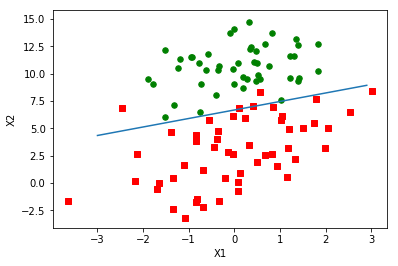

In [17]:
weights=gradAscent(dataArr,labe1Mat)
plotBestFit(weights.getA())

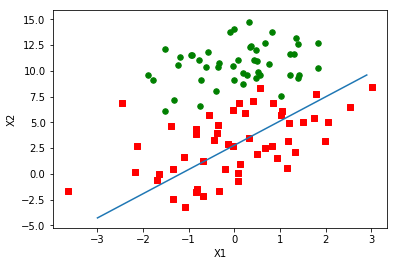

In [20]:
dataArr,labe1Mat=loadDataSet()
weights=stocGradAscent0(np.array(dataArr), labe1Mat)
plotBestFit(weights)

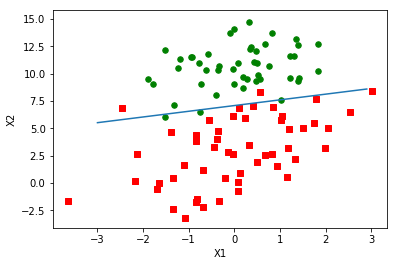

In [21]:
dataArr,labe1Mat=loadDataSet()
weights=stocGradAscent1(np.array(dataArr), labe1Mat)
plotBestFit(weights)`

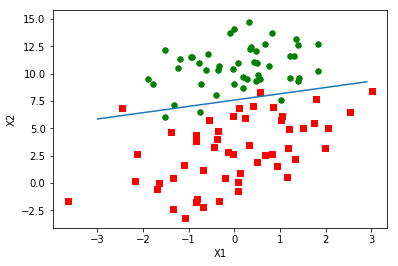

In [23]:
weights=stocGradAscent1(np.array(dataArr), labe1Mat,500)
plotBestFit(weights)


In [24]:
multiTest()

D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


the error rate of this test is: 0.298507
the error rate of this test is: 0.388060
the error rate of this test is: 0.268657
the error rate of this test is: 0.432836
the error rate of this test is: 0.373134
the error rate of this test is: 0.358209
the error rate of this test is: 0.298507
the error rate of this test is: 0.283582
the error rate of this test is: 0.402985
the error rate of this test is: 0.402985
after 10 iterations,the average error rate is: 0.350746


score;  0.21056571894720277
weights:  [ 1.55571223e-02 -3.38529795e-02  4.13850743e-02 -4.37493586e-02
  3.65183318e-02 -4.34219153e-02 -4.01600116e-02 -3.99426320e-02
  7.96770968e-05 -6.95194578e-02  6.98776721e-03 -5.10447752e-02
  3.59275314e-02 -3.06986851e-02 -2.73964278e-02  1.20067158e-02
 -3.00440617e-02 -9.24362350e-02  3.21396146e-02 -2.47486906e-02
 -1.40648366e-02]


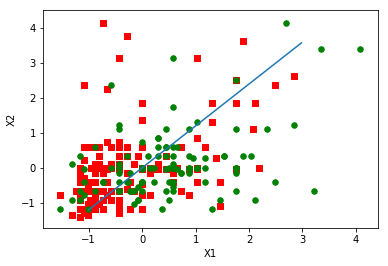

score;  0.2048243052765233
weights:  [ 0.01369638 -0.03524564  0.03826624 -0.04021287  0.03698323 -0.04047714
 -0.0385357  -0.03933907  0.00032446 -0.0693593   0.00964524 -0.04632561
  0.03377799 -0.02943087 -0.03210639  0.01508105 -0.02702727 -0.09294935
  0.03437537 -0.02709371 -0.01513602]


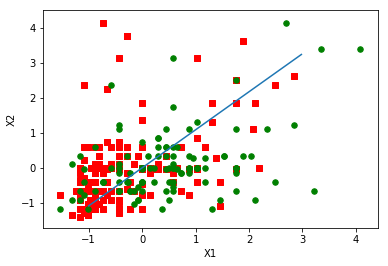

score;  0.2138673457752804
weights:  [ 0.01703315 -0.03562803  0.03939966 -0.04089867  0.03352101 -0.0446441
 -0.03766271 -0.04053325  0.00220569 -0.07137967  0.00990143 -0.04722968
  0.03370403 -0.02856289 -0.03050253  0.01358399 -0.03004718 -0.09072558
  0.03006485 -0.02342713 -0.01671548]


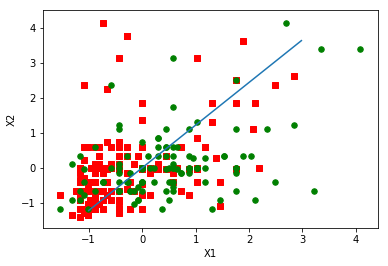

In [118]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
def SGD(iters=100):
    frTrain = open('D:\\PUB128\\horseColic\\horseColicTraining.txt')#打开训练集文件
    frTest = open('D:\\PUB128\\horseColic\\horseColicTest.txt')     #打开测试集文件
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():#将训练集数据存入训练集列表
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))

    testSet=[]
    testLabels=[]
    for line in frTest.readlines():#将测试集数据存入测试集列表
        currLine = line.strip().split('\t')
        lineArr=[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        testSet.append(lineArr)
        testLabels.append(float(currLine[21]))

    for j in range(21):#对每一维度填充缺失值
        sums=0
        num=0
        for i in range(len(trainingSet)):
            if (trainingSet[i][j]!=0):
                sums+=trainingSet[i][j]#取得该维度的非缺失值个数和非缺失值之和
                num+=1
        for i in range(len(trainingSet)):#填充训练集缺失值
            if (trainingSet[i][j]==0):
                trainingSet[i][j]=sums/num
        for i in range(len(testSet)):#填充测试集缺失值
            if (testSet[i][j]==0):
                testSet[i][j]=sums/num    
        
    std = StandardScaler()#对数据进行标准化处理
    std.fit(trainingSet)
    trainingSetstd = std.transform(trainingSet)
    testSetstd = std.transform(testSet)


    sgd_reg = SGDRegressor(max_iter=iters,loss='squared_loss')#进行梯度下降
    sgd_reg.fit(trainingSetstd, trainingLabels)
    print("score; ",sgd_reg.score(testSetstd, testLabels))#求出测试得分
    weights=sgd_reg.coef_#得到权重向量
    print("weights: ",weights)
    
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(len(trainingSetstd)):#可视化 将数据投影到第三维度和第四维度构成的平面上
        if int(trainingLabels[i])== 1:
            xcord1.append(trainingSetstd[i][3]); ycord1.append(trainingSetstd[i][4])
        else:
            xcord2.append(trainingSetstd[i][3]); ycord2.append(trainingSetstd[i][4])    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-1,3 ,0.02)
    y = (-weights[3]*x)/weights[4]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()
    
SGD(100000)

SGD(1000000)
    
SGD(5000000)


weights:  [ 0.15907189 -0.51815374  0.66141366 -1.44359662  0.72952408 -0.82906687
 -0.27805585  0.02756433  0.35182085 -0.10829358  0.14923666 -0.98552864
  0.43798106 -0.55742546 -0.7415804   0.19389135 -0.55258728 -0.94842063
 -0.23078903 -0.17195351  0.10083112]
error:  0.26865671641791045


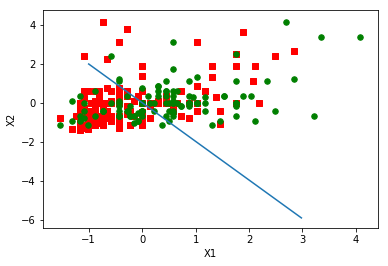

weights:  [ 0.32773999 -0.25613676  0.39339218 -0.57175786  0.57245297 -0.09397023
 -0.15235978 -0.12182328 -0.03766105 -0.51930989 -0.19518518 -0.39156312
  0.21043984 -0.22395143 -0.60458314 -0.0482644   0.12914186 -0.78712149
  0.20907746 -0.28338969 -0.11453368]
error:  0.2537313432835821


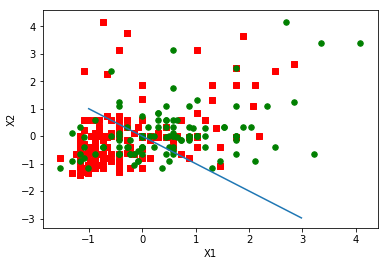

weights:  [ 0.13634876 -0.37811806  0.41286054 -0.3561962   0.17710285 -0.24321358
 -0.34360073 -0.15363346 -0.05195697 -0.6025301   0.00499647 -0.58224519
  0.27977364 -0.09837473 -0.46509521  0.00279993  0.00245144 -0.26468032
 -0.07930804 -0.34830785 -0.08096494]
error:  0.22388059701492538


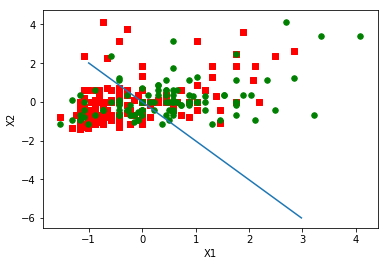

In [123]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
def BGD(iters=10):
    frTrain = open('D:\\PUB128\\horseColic\\horseColicTraining.txt')#打开训练集文件
    frTest = open('D:\\PUB128\\horseColic\\horseColicTest.txt')     #打开测试集文件
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():#将训练集数据存入训练集列表
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))

    testSet=[]
    testLabels=[]
    for line in frTest.readlines():#将测试集数据存入测试集列表
        currLine = line.strip().split('\t')
        lineArr=[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        testSet.append(lineArr)
        testLabels.append(float(currLine[21]))

    for j in range(21):#对每一维度填充缺失值
        sums=0
        num=0
        for i in range(len(trainingSet)):
            if (trainingSet[i][j]!=0):
                sums+=trainingSet[i][j]#取得该维度的非缺失值个数和非缺失值之和
                num+=1
        for i in range(len(trainingSet)):#填充训练集缺失值
            if (trainingSet[i][j]==0):
                trainingSet[i][j]=sums/num
        for i in range(len(testSet)):#填充测试集缺失值
            if (testSet[i][j]==0):
                testSet[i][j]=sums/num    
        
    std = StandardScaler()#对数据进行标准化处理
    std.fit(trainingSet)
    trainingSetstd = std.transform(trainingSet)
    testSetstd = std.transform(testSet)

    weights=stocGradAscent1(np.array(trainingSetstd),trainingLabels,iters)
    print("weights: ",weights)
    
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    
    for i in range(len(trainingSet)):#可视化 将数据投影到第三维度和第四维度构成的平面上
        if int(trainingLabels[i])== 1:
            xcord1.append(trainingSetstd[i][3]); ycord1.append(trainingSetstd[i][4])
        else:
            xcord2.append(trainingSetstd[i][3]); ycord2.append(trainingSetstd[i][4])    
    error=0
    for i in range(len(testSetstd)):
        if int(testLabels[i])!=int(classifyVector(np.array(testSetstd[i]),weights)):
            error+=1
    print("error: ",error/len(testSetstd))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-1,3 ,0.02)
    y = (weights[3]*x)/weights[4]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()
    
BGD(10)

BGD(35)
    
BGD(100)


weights:  [ 0.35251299 -0.32177716  0.41365969 -0.19778957  0.32917239 -0.21655141
 -0.18364463 -0.54842391  0.19434432 -0.46801298  0.26050028 -0.32378385
  0.28565917 -0.13709483 -0.49703367  0.24212517 -0.18919045 -0.87896659
  0.1732924  -0.25920779 -0.32271488]
error:  0.19402985074626866


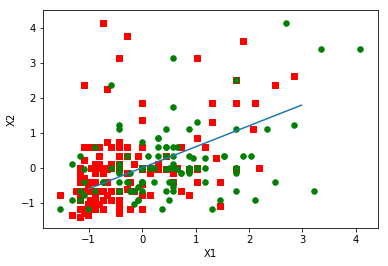

weights:  [ 0.12976462 -0.13933287  0.21814097 -0.23122736  0.35843492 -0.21384522
 -0.24847034 -0.25191705  0.12699322 -0.52088022  0.14980848 -0.23515414
  0.19694288 -0.1361945  -0.04905084 -0.01838807 -0.39228455 -0.56956969
  0.20202133 -0.19000215 -0.08873077]
error:  0.22388059701492538


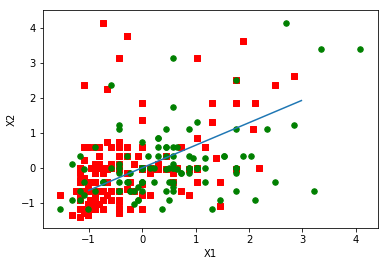

weights:  [ 0.07865096 -0.20729786  0.18002586 -0.25178629  0.22977375 -0.17459945
 -0.19991754 -0.1406801   0.13290246 -0.46373658  0.07314765 -0.31452461
  0.17566624 -0.0966451  -0.15298973  0.04028463 -0.18860458 -0.69042476
  0.26452496 -0.25871984 -0.11573154]
error:  0.22388059701492538


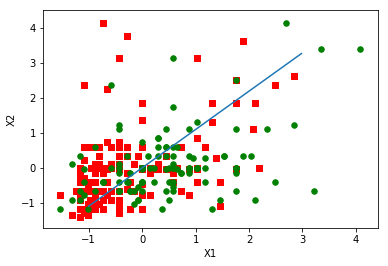

In [126]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
def stocGradAscent2(dataMatrix, classLabels, maxIter=150):
    '''
    输入：数据集，对应数据的类标签
    输出：回归系数
    描述：stocGradAscent0函数的改进版本，降低了结果的
    周期性波动，提高了结果的收敛速度
    注：相对stocGradAscent0改进的部分用
    '''
    m,n = np.shape(dataMatrix)  #得到数据集 行数（样本数）和 列数（特征数)
    weights = np.ones(n)        #将回归系数各分量初始化为1
    for j in range(maxIter):
        dataIndex = list(range(m))
        for i in range(int(m*0.1)):
            alpha = 4/(1.0+j+i)+0.0001 #【改进1】：alpha在每次迭代都会调整，会一定程度上缓解
                                       #结果的周期性波动。同时，由于常数项的存在，虽然alpha会
                                       #随着迭代次数不断减少，但永远都不会减少到 0。这保证了多
                                       #次迭代后新数据仍然会有影响
            randIndex = int(np.random.uniform(0,len(dataIndex)))#【改进2】：随机选取样本更新回归系数
                                                             #也可缓解结果的周期性波动
            h = sigmoid(sum(dataMatrix[randIndex]*weights))            #得到sigmoid的输出值
            error = classLabels[randIndex] - h                         #使用向量减法计算误差
            weights = weights + alpha * error * dataMatrix[randIndex]  #梯度上升法迭代式实现
            del(dataIndex[randIndex])  #将随机选择的样本从数据集中删除，避免影响下一次迭代
    return weights
def MBGD(iters=10):
    frTrain = open('D:\\PUB128\\horseColic\\horseColicTraining.txt')#打开训练集文件
    frTest = open('D:\\PUB128\\horseColic\\horseColicTest.txt')     #打开测试集文件
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():#将训练集数据存入训练集列表
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))

    testSet=[]
    testLabels=[]
    for line in frTest.readlines():#将测试集数据存入测试集列表
        currLine = line.strip().split('\t')
        lineArr=[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        testSet.append(lineArr)
        testLabels.append(float(currLine[21]))

    for j in range(21):#对每一维度填充缺失值
        sums=0
        num=0
        for i in range(len(trainingSet)):
            if (trainingSet[i][j]!=0):
                sums+=trainingSet[i][j]#取得该维度的非缺失值个数和非缺失值之和
                num+=1
        for i in range(len(trainingSet)):#填充训练集缺失值
            if (trainingSet[i][j]==0):
                trainingSet[i][j]=sums/num
        for i in range(len(testSet)):#填充测试集缺失值
            if (testSet[i][j]==0):
                testSet[i][j]=sums/num    
        
    std = StandardScaler()#对数据进行标准化处理
    std.fit(trainingSet)
    trainingSetstd = std.transform(trainingSet)
    testSetstd = std.transform(testSet)

    weights=stocGradAscent2(np.array(trainingSetstd),trainingLabels,iters)
    print("weights: ",weights)
    
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    
    for i in range(len(trainingSet)):#可视化 将数据投影到第三维度和第四维度构成的平面上
        if int(trainingLabels[i])== 1:
            xcord1.append(trainingSetstd[i][3]); ycord1.append(trainingSetstd[i][4])
        else:a
            xcord2.append(trainingSetstd[i][3]); ycord2.append(trainingSetstd[i][4])    
    error=0
    for i in range(len(testSetstd)):
        if int(testLabels[i])!=int(classifyVector(np.array(testSetstd[i]),weights)):
            error+=1
    print("error: ",error/len(testSetstd))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-1,3 ,0.02)
    y = (-weights[3]*x)/weights[4]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()
    
MBGD(100)

MBGD(350)
    
MBGD(1000)


D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score;  0.7611940298507462
weights:  [[ 0.14480527 -0.25858108  0.22157432 -0.13564336  0.17401842 -0.27158229
  -0.18926273 -0.23259384  0.04511295 -0.46558005  0.0426536  -0.32683358
   0.24701751 -0.16936233 -0.1558688   0.07653782 -0.22861975 -0.60942261
   0.22848405 -0.15526269 -0.04915067]]


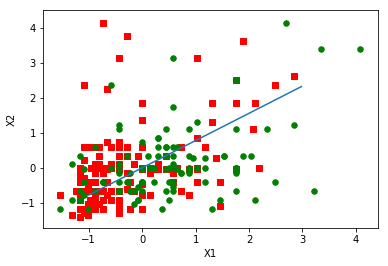

D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score;  0.7611940298507462
weights:  [[ 0.14480527 -0.25858108  0.22157432 -0.13564336  0.17401842 -0.27158229
  -0.18926273 -0.23259384  0.04511295 -0.46558005  0.0426536  -0.32683358
   0.24701751 -0.16936233 -0.1558688   0.07653782 -0.22861975 -0.60942261
   0.22848405 -0.15526269 -0.04915067]]


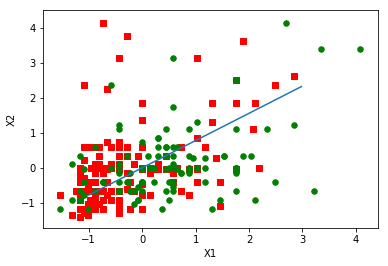

D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score;  0.7611940298507462
weights:  [[ 0.14480527 -0.25858108  0.22157432 -0.13564336  0.17401842 -0.27158229
  -0.18926273 -0.23259384  0.04511295 -0.46558005  0.0426536  -0.32683358
   0.24701751 -0.16936233 -0.1558688   0.07653782 -0.22861975 -0.60942261
   0.22848405 -0.15526269 -0.04915067]]


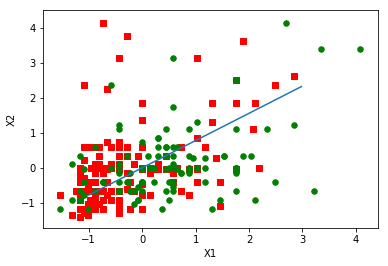

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
def LOGREG(iters=100):
    frTrain = open('D:\\PUB128\\horseColic\\horseColicTraining.txt')#打开训练集文件
    frTest = open('D:\\PUB128\\horseColic\\horseColicTest.txt')     #打开测试集文件
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():#将训练集数据存入训练集列表
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))

    testSet=[]
    testLabels=[]
    for line in frTest.readlines():#将测试集数据存入测试集列表
        currLine = line.strip().split('\t')
        lineArr=[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        testSet.append(lineArr)
        testLabels.append(float(currLine[21]))

    for j in range(21):#对每一维度填充缺失值
        sums=0
        num=0
        for i in range(len(trainingSet)):
            if (trainingSet[i][j]!=0):
                sums+=trainingSet[i][j]#取得该维度的非缺失值个数和非缺失值之和
                num+=1
        for i in range(len(trainingSet)):#填充训练集缺失值
            if (trainingSet[i][j]==0):
                trainingSet[i][j]=sums/num
        for i in range(len(testSet)):#填充测试集缺失值
            if (testSet[i][j]==0):
                testSet[i][j]=sums/num    
        
    std = StandardScaler()#对数据进行标准化处理
    std.fit(trainingSet)
    trainingSetstd = std.transform(trainingSet)
    testSetstd = std.transform(testSet)


    log_reg = LogisticRegression(max_iter=iters)#进行梯度下降
    log_reg.fit(trainingSetstd, trainingLabels)
    print("score; ",log_reg.score(testSetstd, testLabels))#求出测试得分
    weights=log_reg.coef_#得到权重向量
    print("weights: ",weights)
    
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(len(trainingSet)):#可视化 将数据投影到第三维度和第四维度构成的平面上
        if int(trainingLabels[i])== 1:
            xcord1.append(trainingSetstd[i][3]); ycord1.append(trainingSetstd[i][4])
        else:
            xcord2.append(trainingSetstd[i][3]); ycord2.append(trainingSetstd[i][4])    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-1,3 ,0.02)
    y = (-weights[0,3]*x)/weights[0,4]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()
    
LOGREG(100)

LOGREG(1000)
    
LOGREG(5000)



[ 0.0077714  -0.0026997   0.00182931 -0.01639554 -0.00328529 -0.0152642
 -0.01796598 -0.01892537 -0.01449901 -0.01651487 -0.01389687 -0.01612194
 -0.00010844 -0.00930663 -0.00168012 -0.00890162 -0.01138659 -0.01898703
  0.00619274 -0.01160097 -0.00284627] [0.0094093]
error:  0.29850746268656714


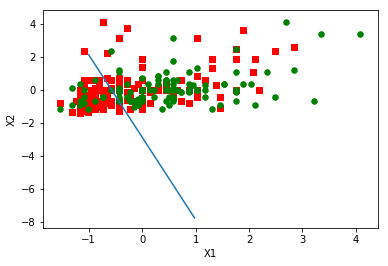

[ 0.01457255 -0.00518714  0.00384806 -0.03100945 -0.00587454 -0.02889598
 -0.03391837 -0.03586965 -0.027243   -0.03142923 -0.02599684 -0.0304652
  0.00010965 -0.01764863 -0.00341726 -0.01645188 -0.02144502 -0.0361907
  0.01199576 -0.02197551 -0.00554199] [0.01858804]
error:  0.29850746268656714


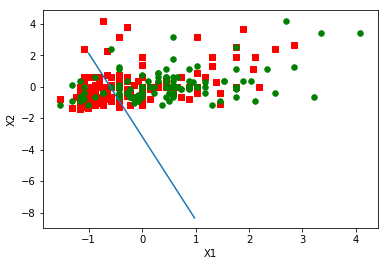

[ 0.02577025 -0.00963975  0.00832977 -0.05576714 -0.00933733 -0.05207057
 -0.06076656 -0.06477869 -0.04833103 -0.05724841 -0.04572544 -0.05470734
  0.00134625 -0.03191243 -0.0070059  -0.02820918 -0.03825954 -0.06610342
  0.02259385 -0.03963985 -0.01052867] [0.0362883]
error:  0.29850746268656714


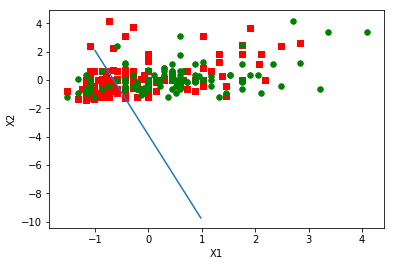

In [132]:
import tensorflow as tf
def tfLogReg(max_iter):
    frTrain = open('D:\\PUB128\\horseColic\\horseColicTraining.txt')#打开训练集文件
    frTest = open('D:\\PUB128\\horseColic\\horseColicTest.txt')     #打开测试集文件
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():#将训练集数据存入训练集列表
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))

    testSet=[]
    testLabels=[]
    for line in frTest.readlines():#将测试集数据存入测试集列表
        currLine = line.strip().split('\t')
        lineArr=[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        testSet.append(lineArr)
        testLabels.append(float(currLine[21]))

    for j in range(21):#对每一维度填充缺失值
        sums=0
        num=0
        for i in range(len(trainingSet)):
            if (trainingSet[i][j]!=0):
                sums+=trainingSet[i][j]#取得该维度的非缺失值个数和非缺失值之和
                num+=1
        for i in range(len(trainingSet)):#填充训练集缺失值
            if (trainingSet[i][j]==0):
                trainingSet[i][j]=sums/num
        for i in range(len(testSet)):#填充测试集缺失值
            if (testSet[i][j]==0):
                testSet[i][j]=sums/num    
        
    std=StandardScaler()#对数据进行标准化处理
    std.fit(trainingSet)
    trainingSetstd=std.transform(trainingSet)
    testSetstd=std.transform(testSet)
    
    dataMat=np.mat(trainingSetstd).astype(np.float32)#shape=[n,21]
    labelMat=np.mat(trainingLabels).transpose().astype(np.float32)#shape=[1,n]
    n=dataMat.shape[0]



    weight=tf.Variable(tf.zeros([21,1]))
    bias=tf.Variable(tf.zeros([1,1]))

    x_=tf.placeholder(tf.float32,[None,21])
    y_=tf.placeholder(tf.float32,[None,1])

    g=tf.matmul(x_,weight)+bias#内积加偏置
    hyp=tf.sigmoid(g) #传入sigmoid函数
    cost=(y_*tf.log(hyp)+(1-y_)*tf.log(1 - hyp))/-n # logistic回归的对数损失函数
    

    optimizer = tf.train.GradientDescentOptimizer(0.01)
    train = optimizer.minimize(cost)# 最小化logistic回归的对数损失函数

    init=tf.initialize_all_variables()
    with tf.Session() as sess:
        sess.run(init)
        for niter in range(max_iter):#迭代轮数，训练多少轮
            for data,label in zip(dataMat,labelMat):#
                sess.run(train, feed_dict={x_: data, y_: label})
        print(sess.run(weight).flatten(),sess.run(bias).flatten())
        #cost_val=sess.run(cost, {x_: data, y_: label})
        #print('cost = ',cost_val)
        #print('weight = ',weight.eval(sess).flatten())
        w=weight.eval(sess).flatten()
        b=sess.run(bias).flatten()

    error=0
    for i in range(len(testSetstd)):
        if int(testLabels[i])!=int(classifyVector(np.array(testSetstd[i]),w)+b):
            error+=1
    print("error: ",error/len(testSetstd))        
        
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(len(trainingSet)):#可视化 将数据正规化后投影到第三维度和第四维度构成的平面上
        if int(trainingLabels[i])== 1:
            xcord1.append(trainingSetstd[i][3]); ycord1.append(trainingSetstd[i][4])
        else:
            xcord2.append(trainingSetstd[i][3]); ycord2.append(trainingSetstd[i][4])    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-1,1 ,0.02)
    y = (b-w[3]*x)/w[4]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()
        
        
tfLogReg(10)   
tfLogReg(20) 
tfLogReg(40) 